##データの入手

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Data obtained from http://biostat.mc.vanderbilt.edu/DataSets

In [2]:
data = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.csv')

pclassの型を数値から文字列に変換

In [3]:
data['pclass'] = data['pclass'].map(str)

##データの確認

survived: 1（生存），0（死亡）  
pclass: 乗客の社会経済的地位（1:上流，2:中流，3:下流）  
name: 氏名  
sex: 性別  
age: 年齢  
sibsp: 同乗したSibling/Spouseの数  
parch: 同乗したParent/Childrenの数  
ticket: チケットナンバー  
fare: 乗船料金  
cabin: 船室番号  
embarked: 乗船場（C = Cherbourg, Q = Queenstown; S = Southampton）  
boat: Lifeboat  
body:  Body Identification Number  
home.dest:  Home/Destination

In [4]:
data.describe

<bound method DataFrame.describe of      pclass  survived                                               name  \
0         1         1                      Allen, Miss. Elisabeth Walton   
1         1         1                     Allison, Master. Hudson Trevor   
2         1         0                       Allison, Miss. Helen Loraine   
3         1         0               Allison, Mr. Hudson Joshua Creighton   
4         1         0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
5         1         1                                Anderson, Mr. Harry   
6         1         1                  Andrews, Miss. Kornelia Theodosia   
7         1         0                             Andrews, Mr. Thomas Jr   
8         1         1      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9         1         0                            Artagaveytia, Mr. Ramon   
10        1         0                             Astor, Col. John Jacob   
11        1         1  Astor, Mrs. John Jacob (Madel

##欠損値の確認

In [5]:
(len(data) - data.count()) / len(data)

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

##特徴量の選択

欠損値の多い特徴量や，分析に有効でなさそうな特徴量を削除します．  
※本来特徴量の選択は分析の試行錯誤のなかで行うべきですが，演習の都合上最初に行っています．

In [6]:
data2 = data.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], 1)

## データの可視化

カテゴリデータ（pclass, embarked, sex）は積み上げ棒グラフにして  
変数の割合と，変数内の生死の割合を可視化

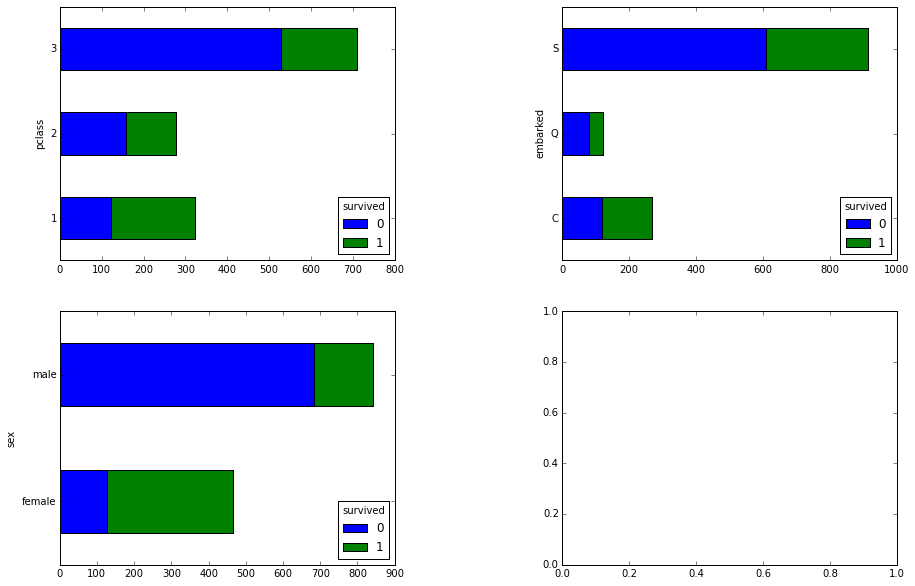

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

pd.pivot_table(data2, index=['pclass'], columns=['survived'],
               aggfunc='count')['sex'].plot(kind='barh', stacked=True,
                                            ax=axes[0,0])

pd.pivot_table(data2, index=['embarked'], columns=['survived'],
               aggfunc='count')['pclass'].plot(kind='barh', stacked=True,
                                               ax=axes[0,1])

pd.pivot_table(data2, index=['sex'], columns=['survived'],
               aggfunc='count')['pclass'].plot(kind='barh', stacked=True,
                                               ax=axes[1,0])

plt.subplots_adjust(wspace=.5)

数値データ（age, sibsp, parch, fare）は生／死ごとにヒストグラムで可視化

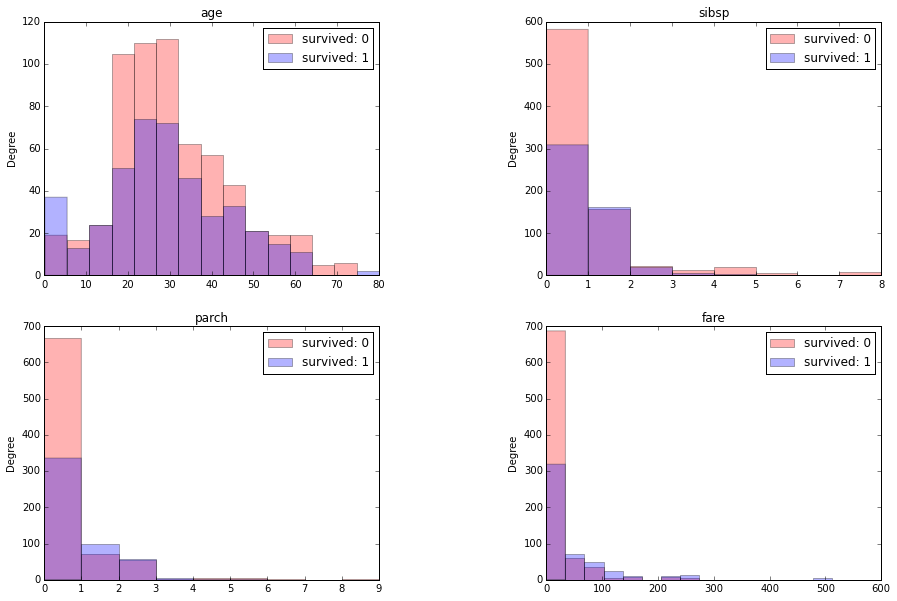

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

h = pd.concat([data2['age'][data2['survived']==0],
               data2['age'][data2['survived']==1]], axis=1)
h.columns = ['survived: 0', 'survived: 1']
h.plot(kind='hist', bins=15, alpha=0.3, color=('r','b'),
       ax=axes[0,0], title='age')

h = pd.concat([data2['sibsp'][data2['survived']==0],
               data2['sibsp'][data2['survived']==1]], axis=1)
h.columns = ['survived: 0', 'survived: 1']
h.plot(kind='hist', bins=8, alpha=0.3, color=('r','b'),
       ax=axes[0,1], title='sibsp')

h = pd.concat([data2['parch'][data2['survived']==0],
               data2['parch'][data2['survived']==1]], axis=1)
h.columns = ['survived: 0', 'survived: 1']
h.plot(kind='hist', bins=9, alpha=0.3, color=('r','b'),
       ax=axes[1,0], title='parch')

h = pd.concat([data2['fare'][data2['survived']==0],
               data2['fare'][data2['survived']==1]], axis=1)
h.columns = ['survived: 0', 'survived: 1']
h.plot(kind='hist', bins=15, alpha=0.3, color=('r','b'),
       ax=axes[1,1], title='fare')

plt.subplots_adjust(wspace=.5)

#### 特徴量同士の関係を可視化  
カテゴリデータ同士の関係はクロス集計（Cross tabulation）で可視化  
※parch, sibspは数値データですが，取りうる値が限られているためクロス集計を利用

In [9]:
pd.crosstab(data2['embarked'], data2['pclass'])

pclass,1,2,3
embarked,,,
C,141,28,101
Q,3,7,113
S,177,242,495


In [10]:
pd.crosstab(data2['embarked'], data2['sex'])

sex,female,male
embarked,,
C,113,157
Q,60,63
S,291,623


In [11]:
pd.crosstab(data2['embarked'], data2['sibsp'])

sibsp,0,1,2,3,4,5,8
embarked,,,,,,,
C,171,90,9,0,0,0,0
Q,100,14,4,0,5,0,0
S,618,215,29,20,17,6,9


In [12]:
pd.crosstab(data2['embarked'], data2['parch'])

parch,0,1,2,3,4,5,6,9
embarked,,,,,,,,
C,196,51,20,3,0,0,0,0
Q,114,7,1,0,0,1,0,0
S,690,112,92,5,6,5,2,2


In [13]:
pd.crosstab(data2['pclass'], data2['sex'])

sex,female,male
pclass,,
1,144,179
2,106,171
3,216,493


In [14]:
pd.crosstab(data2['pclass'], data2['sibsp'])

sibsp,0,1,2,3,4,5,8
pclass,,,,,,,
1,198,113,8,4,0,0,0
2,182,82,12,1,0,0,0
3,511,124,22,15,22,6,9


In [15]:
pd.crosstab(data2['pclass'], data2['parch'])

parch,0,1,2,3,4,5,6,9
pclass,,,,,,,,
1,242,50,27,2,2,0,0,0
2,206,43,25,3,0,0,0,0
3,554,77,61,3,4,6,2,2


In [16]:
pd.crosstab(data2['sex'], data2['sibsp'])

sibsp,0,1,2,3,4,5,8
sex,,,,,,,
female,262,160,19,12,7,2,4
male,629,159,23,8,15,4,5


In [17]:
pd.crosstab(data2['sex'], data2['parch'])

parch,0,1,2,3,4,5,6,9
sex,,,,,,,,
female,293,88,69,6,4,4,1,1
male,709,82,44,2,2,2,1,1


In [18]:
pd.crosstab(data2['sibsp'], data2['parch'])

parch,0,1,2,3,4,5,6,9
sibsp,,,,,,,,
0,790,52,43,2,2,2,0,0
1,183,90,29,5,4,4,2,2
2,26,9,6,1,0,0,0,0
3,3,9,8,0,0,0,0,0
4,0,10,12,0,0,0,0,0
5,0,0,6,0,0,0,0,0
8,0,0,9,0,0,0,0,0


数値データとカテゴリデータの関係は箱ひげ図（boxplot）で可視化

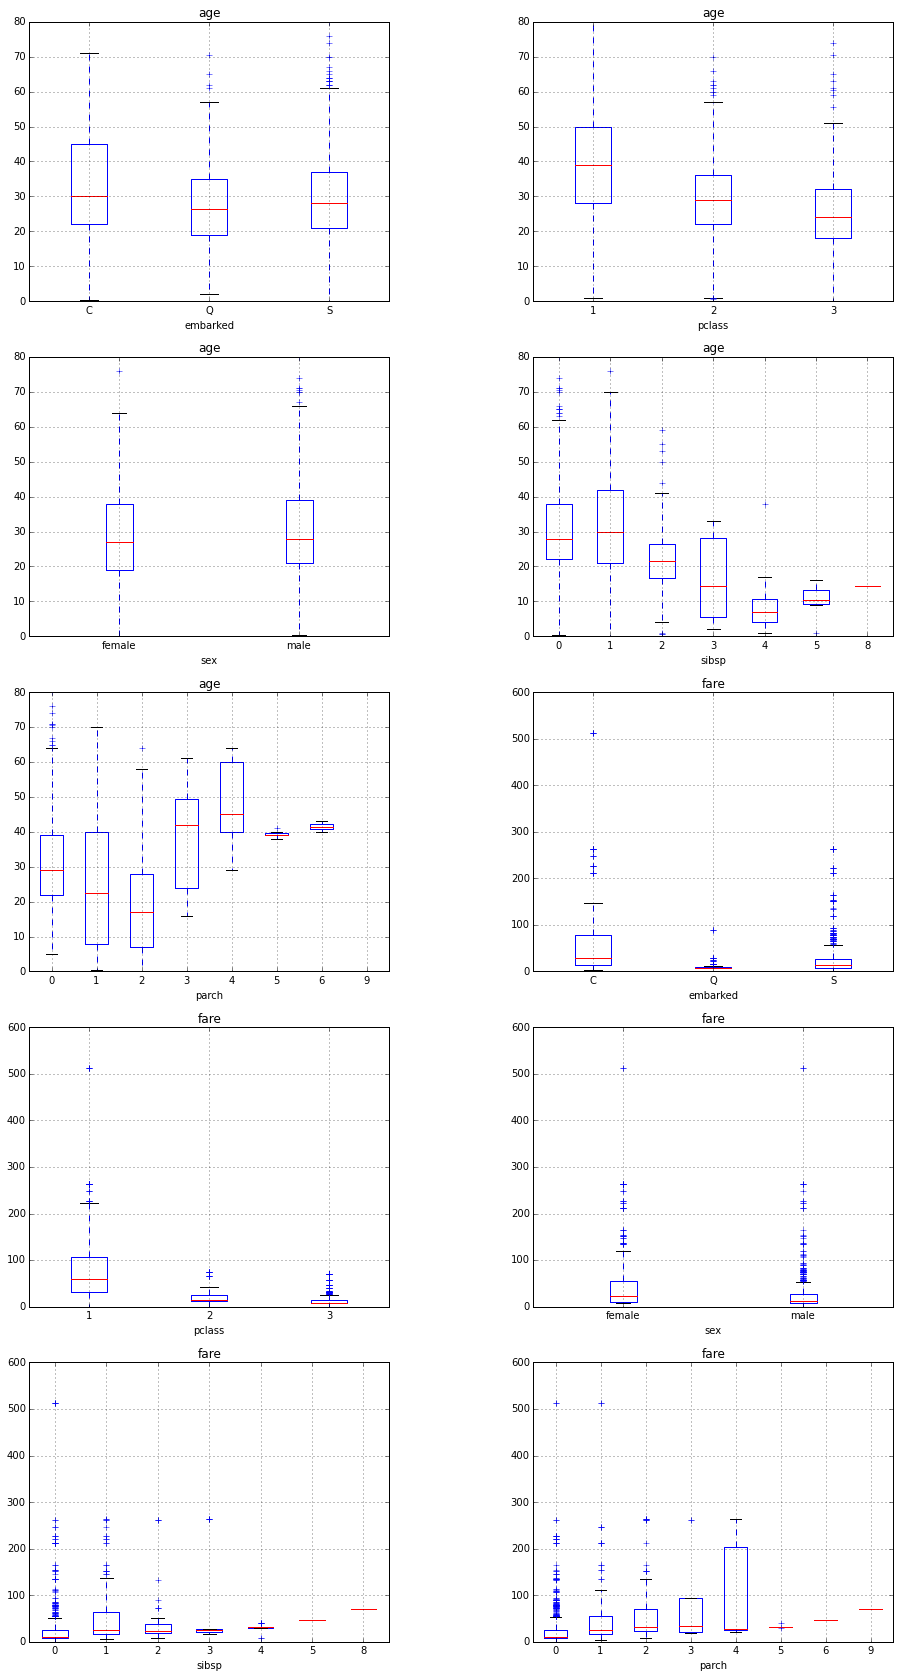

In [19]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))
data2.boxplot(column='age', by='embarked', ax=axes[0,0])
data2.boxplot(column='age', by='pclass', ax=axes[0,1])
data2.boxplot(column='age', by='sex', ax=axes[1,0])
data2.boxplot(column='age', by='sibsp', ax=axes[1,1])
data2.boxplot(column='age', by='parch', ax=axes[2,0])
data2.boxplot(column='fare', by='embarked', ax=axes[2,1])
data2.boxplot(column='fare', by='pclass', ax=axes[3,0])
data2.boxplot(column='fare', by='sex', ax=axes[3,1])
data2.boxplot(column='fare', by='sibsp', ax=axes[4,0])
data2.boxplot(column='fare', by='parch', ax=axes[4,1])
plt.suptitle('')
plt.subplots_adjust(wspace=.4, hspace=.2)

数値データ同士の関係は散布図（Scatter plot）で可視化

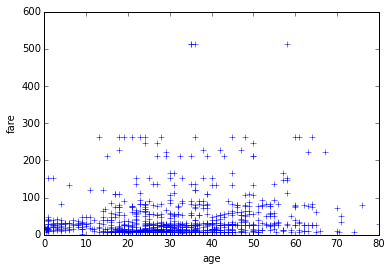

In [20]:
plt.plot(data2['age'], data2['fare'], 'b+')
plt.xlabel('age')
plt.ylabel('fare')
plt.suptitle('')
plt.subplots_adjust(wspace=.4, hspace=.2)

## 欠損値の処理

今回は，数値データは中央値で，カテゴリデータは最頻値で補間します．  
ただし，運賃（fare）は社会経済的地位（pclass）と相関があるため※  
等級ごとの中央値で補間します．  
※pclassとfareの可視化結果（boxplot）参照

In [21]:
age_median = data2['age'].dropna().median()
embarked_mode = data2['embarked'].dropna().mode().values
fare_median_c1 = data2['fare'][data2['pclass']=='1'].dropna().median()
fare_median_c2 = data2['fare'][data2['pclass']=='2'].dropna().median()
fare_median_c3 = data2['fare'][data2['pclass']=='3'].dropna().median()

In [22]:
data2.loc[data2['age'].isnull(), 'age'] = age_median
data2.loc[data2['embarked'].isnull(), 'embarked'] = embarked_mode
data2.loc[(data2['fare'].isnull()) & (data2['pclass']=='1'), 'fare'] = fare_median_c1
data2.loc[(data2['fare'].isnull()) & (data2['pclass']=='2'), 'fare'] = fare_median_c2
data2.loc[(data2['fare'].isnull()) & (data2['pclass']=='3'), 'fare'] = fare_median_c3

In [23]:
(len(data2) - data2.count()) / len(data2)

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: float64

## カテゴリ変数の処理

DictVectorizerはN種類の変数をN個の数値特徴量に変換しますが  
これは冗長なので，1つ削除します

In [24]:
from sklearn.feature_extraction import DictVectorizer as DV

In [25]:
vec = DV()
data2 = pd.DataFrame(vec.fit_transform(data2.T.to_dict().values()).toarray(),
                     columns=vec.get_feature_names(), index=data2.index)
del data2['embarked=S']
del data2['pclass=3']
del data2['sex=male']

scikit-learnの入力に合わせ，特徴量と目的変数を分けます

In [26]:
data2_y = data2.pop('survived')

## データの標準化

数値データを平均0，分散1に標準化します．

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
standardizer = StandardScaler().fit(data2.loc[:, ['age', 'sibsp', 'parch', 'fare']])
data2.loc[:, ['age', 'sibsp', 'parch', 'fare']] =\
    standardizer.transform(data2.loc[:, ['age', 'sibsp', 'parch', 'fare']])

## モデリング

決定木（Decision tree）を使って生死を予測してみます．  
予測結果は精度（accuracy）で評価します．

$$精度 = \frac{正解数}{データ数}$$

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
clf0 = DecisionTreeClassifier(random_state=1).fit(data2, data2_y)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(data2_y, clf0.predict(data2))

0.96562261268143623

## グリッドサーチと交差検証

In [33]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold

In [34]:
cv = KFold(data2.shape[0], n_folds=10, shuffle=True, random_state=1)
clf1 = GridSearchCV(DecisionTreeClassifier(random_state=1),
                    [{'max_depth': [3, 5, 7]}],
                    cv=cv, scoring='accuracy', n_jobs=-1).fit(data2, data2_y)

In [35]:
clf1.best_params_

{'max_depth': 5}

In [36]:
clf1.best_score_

0.799083269671505

## 学習曲線

In [37]:
from sklearn.learning_curve import learning_curve
import numpy as np

In [38]:
cv = KFold(data2.shape[0], n_folds=10, shuffle=True, random_state=1)
train_sizes, train_scores, test_scores = learning_curve(
        clf1.best_estimator_, data2, data2_y, cv=cv, scoring='accuracy',
        train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

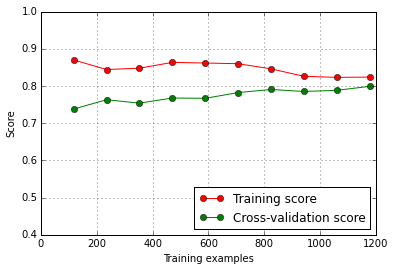

In [39]:
plt.figure()
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.ylim((0.4, 1.))
plt.legend(loc="lower right")

学習曲線をみると，  

+ 訓練スコアが低い  
+ 訓練スコアと交差検証スコアの差が小さい  

ことから，**ハイバイアス**な状態であると分かります．

そこで，性能改善のために，  

+ 柔軟性の高いモデルに変更する  
+ 特徴量を追加する  

を検討してみます．

## モデルの変更

モデルをより柔軟性の高い，アンサンブル学習（ブースティング）を利用したGradientBoostingClassifierに変更してみます．

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
cv = KFold(data2.shape[0], n_folds=10, shuffle=True, random_state=1)
clf2 = GridSearchCV(GradientBoostingClassifier(n_estimators=100, random_state=1),
                    [{'max_leaf_nodes': [3, 5, 7, 9],
                      'min_samples_leaf': [9, 13, 17, 21],
                      'learning_rate': [0.3, 0.4, 0.5]}],
                    cv=cv, scoring='accuracy', n_jobs=-1).fit(data2, data2_y)

In [42]:
clf2.best_params_

{'learning_rate': 0.4, 'max_leaf_nodes': 5, 'min_samples_leaf': 17}

In [43]:
clf2.best_score_

0.82352941176470584

| グリッドサーチ＋交差検証 | モデル変更
| -: |-------------: 
|0.799| 0.824

## 特徴量の追加，変更

欠損率が高く利用を見送っていた**cabin**の情報を利用してみます．  
cabinは文字＋数値という形なので，文字と数値に分離して利用します．

In [44]:
data3 = data2.copy(deep=True)

In [45]:
import re
data3['cabin'] = data['cabin']
data3.loc[data3['cabin'].isnull(), 'cabin'] = 'unknown'

cabin_room = [re.sub('^[^\d]+(\d+).*$', '\\1', c) for c in data3['cabin']]
data3['cabin_room'] = [int(c) if c.isdigit() else 0 for c in cabin_room]

data3['cabin'] = [re.sub('^([A-Z]).*$', '\\1', c) for c in data3['cabin']]

vec = DV()
data3 = pd.DataFrame(vec.fit_transform(data3.T.to_dict().values()).toarray(),
                     columns=vec.get_feature_names(), index=data3.index)
del data3['cabin=unknown']

In [46]:
cv = KFold(data3.shape[0], n_folds=10, shuffle=True, random_state=1)
clf3 = GridSearchCV(GradientBoostingClassifier(n_estimators=100, random_state=1),
                    [{'max_leaf_nodes': [3, 5, 7, 9],
                      'min_samples_leaf': [5, 9, 13, 17],
                      'learning_rate': [0.1, 0.2, 0.3, 0.4]}],
                    cv=cv, scoring='accuracy', n_jobs=-1).fit(data3, data2_y)

In [47]:
clf3.best_params_

{'learning_rate': 0.3, 'max_leaf_nodes': 5, 'min_samples_leaf': 9}

In [48]:
clf3.best_score_

0.82887700534759357

| グリッドサーチ＋交差検証 | モデル変更 | cabin利用 
| -: |-------------: | -: 
|0.799| 0.824 | 0.829 

単純に中央値で補間していた年齢の欠損値を，その他の特徴量を使って予測してみます．

In [49]:
data4 = data3.copy(deep=True)
title = [re.split('\.|,', n)[1].strip() for n in data['name']]
data4['immature'] = [1 if t in ['Master', 'Mlle', 'Miss'] else 0 for t in title]
data4 = data4[['sibsp', 'parch', 'pclass=1', 'pclass=2', 'fare', 'immature']]
cv = KFold(data4[data['age'].notnull()].shape[0], n_folds=10, shuffle=True,
           random_state=1)
from sklearn.tree import DecisionTreeRegressor
clf_age = GridSearchCV(DecisionTreeRegressor(random_state=1),
                       [{'max_depth': [2, 3, 4]}],
                       cv=cv,
                       n_jobs=-1).fit(data4[data['age'].notnull()],
                                     data['age'][data['age'].notnull()])
clf_age.best_params_

{'max_depth': 3}

In [50]:
data3.loc[data['age'].isnull(), 'age'] = clf_age.predict(data4[data['age'].isnull()])

In [51]:
cv = KFold(data3.shape[0], n_folds=10, shuffle=True, random_state=1)
clf4 = GridSearchCV(GradientBoostingClassifier(n_estimators=100, random_state=1),
                    [{'max_leaf_nodes': [5, 7, 9, 11],
                      'min_samples_leaf': [13, 17, 21, 25],
                      'learning_rate': [0.1, 0.2, 0.3, 0.4]}],
                    cv=cv, scoring='accuracy', n_jobs=-1).fit(data3, data2_y)

In [52]:
clf4.best_params_

{'learning_rate': 0.2, 'max_leaf_nodes': 7, 'min_samples_leaf': 17}

In [53]:
clf4.best_score_

0.8304048892284186

| グリッドサーチ＋交差検証 | モデル変更 | cabin利用 | age予測 
| -: |-------------: | -: | -: 
|0.799| 0.824 | 0.829 | 0.830 